In [4]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython.display as display

Going to work with the music mp3 files

In [5]:
display.Audio("audiofiles/Ai Ni - Kimberly Chen.m4a")

Load into librosa

In [6]:
aini, sr = librosa.load("audiofiles/Ai Ni - Kimberly Chen.m4a")

C:\Users\Brandon\miniconda3\envs\tensorflowenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
aini.shape

(4496384,)

In [9]:
mfccs = librosa.feature.mfcc(aini,
                            n_mfcc=13,
                            sr=sr)

In [10]:
mfccs.shape

(13, 8783)

13 rows because we have 13 coefficients

and there are 8783 discrete time frames

Visualize MFCCS

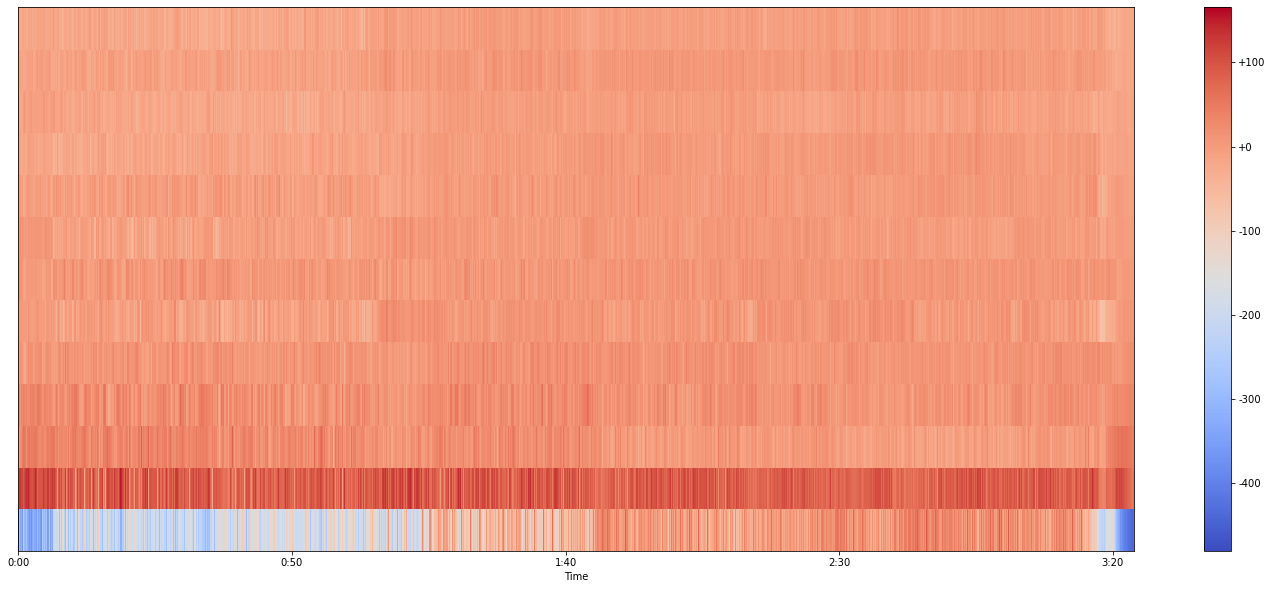

In [13]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Compute the first and second derivative of MFCCs via the deltas

In [14]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs,order=2)

In [15]:
delta_mfccs.shape

(13, 8783)

In [16]:
delta2_mfccs.shape

(13, 8783)

These have the same shape as the original MFCCs matrix -- lets visualize them

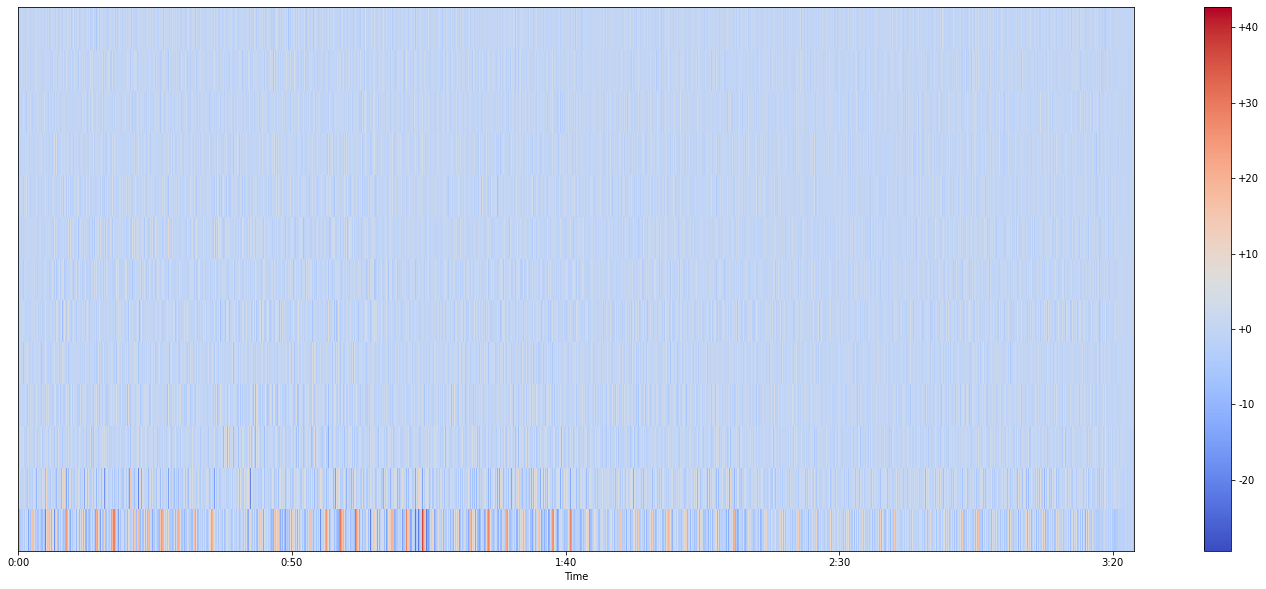

In [17]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

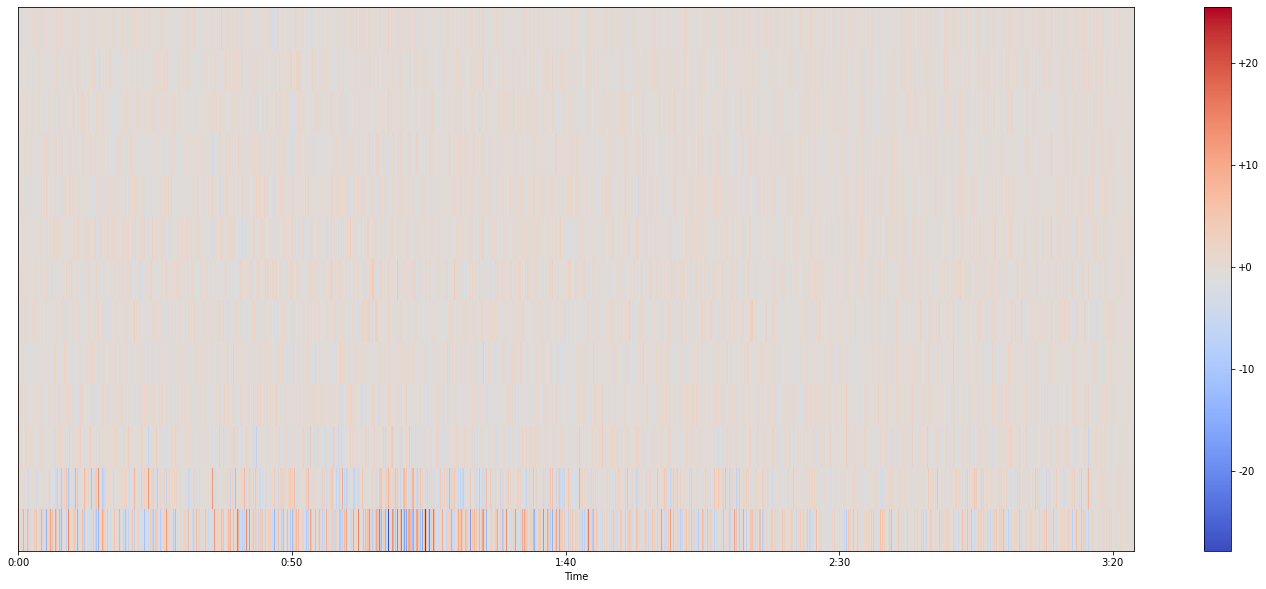

In [18]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Combine the MFCC, Delta_MFCC, and Delta2_MFCC to create a comprehensive feature

In [19]:
comprehensive_mfcc = np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
comprehensive_mfcc.shape

(39, 8783)

See that we have 13*3 = 39 features now

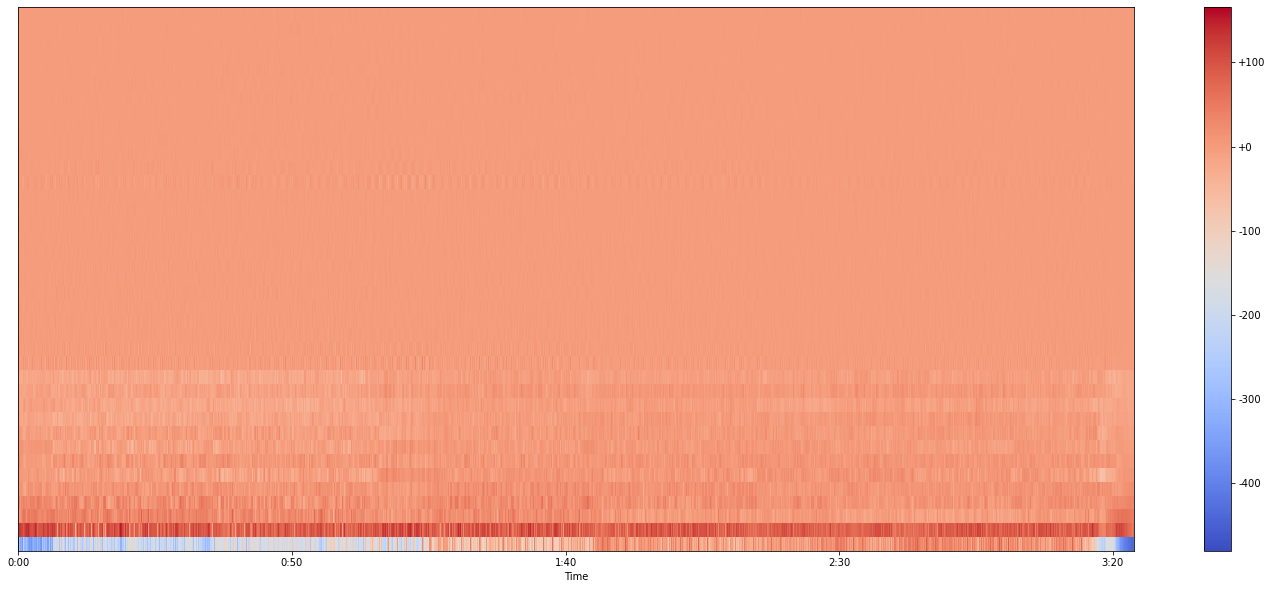

In [20]:
plt.figure(figsize=(25,10))
librosa.display.specshow(comprehensive_mfcc,
                        x_axis='time',
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show()